# Customer Analysis Project

In [1]:
%matplotlib inline
### import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
from datetime import datetime

import squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [2]:
df_service_requests=pd.read_csv('C:/Users/Inpreet Singh/Downloads/datasets/Data-Science-with-Python-Project-2--master/311_Service_Requests_from_2010_to_Present.csv')

c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Handling Date and time 

In [3]:
df_service_requests=pd.read_csv('C:/Users/Inpreet Singh/Downloads/datasets/Data-Science-with-Python-Project-2--master/311_Service_Requests_from_2010_to_Present.csv',parse_dates=["Created Date", "Closed Date"])

***  With the help of parsing ,transform the data into appropriate format 

In [4]:
df_service_requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df_service_requests.shape

(300698, 53)

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)

In [7]:
df_service_requests.shape

(300698, 53)

In [8]:
df_service_requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
df_service_requests.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,EAST 186,NaN,east 186,NaN,NaN,NaN,NaN,NaN,Open,03/29/2015 08:33:41 AM,Your complaint has been forwarded to the New Y...,NaN,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,DEAD END,102 STREET,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Closed,03/29/2015 08:33:28 AM,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,HOPKINS STREET,ELLERY STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,03/29/2015 08:33:03 AM,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,CODDINGTON AVENUE,LA SALLE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,03/29/2015 08:33:02 AM,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,WEST 48 STREET,BROADWAY,8 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,03/29/2015 08:33:01 AM,The Police Department responded to the complai...,03/29/2015 04:41:50 AM,05 MANHATTAN,MANHATTAN,988150.0,216378.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [10]:
df_service_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [11]:
df_service_requests.isnull().sum() #it provide the count of Nan val in dataframe

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [12]:
null_val=df_service_requests.isnull().sum()/df_service_requests.shape[0] *100 #it tell perc of Nan val,column wise

In [13]:
null_val

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [14]:
drop_columns=null_val[null_val>15].keys()

In [15]:
drop_columns

Index(['Cross Street 1', 'Cross Street 2', 'Intersection Street 1',
       'Intersection Street 2', 'Landmark', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'],
      dtype='object')

In [16]:
len(drop_columns)

16

In [17]:
len(df_service_requests.columns)

53

In [18]:
new_df_service_requests=df_service_requests.drop(columns=drop_columns) # we can drop columns which include more than 15 per Nan vlaue

In [19]:
new_df_service_requests.shape

(300698, 37)

In [20]:
new_df_service_requests.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [21]:
new_df_service_requests["Complaint Type"].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [22]:
# new_df_service_requests["Closed Date"]=new_df_service_requests["Closed Date"].dropna()

In [23]:
new_df_service_requests.shape

(300698, 37)

In [24]:
new_df_service_requests['Closed Date'].replace(' ', np.nan, inplace=True)# we can drop only those rows which contain empty cell of closed date

In [25]:
new_df_service_requests.dropna(subset=['Closed Date'], inplace=True)

In [26]:
new_df_service_requests.shape

(298534, 37)

In [27]:
new_df_service_requests.reset_index(drop=True,inplace = True)

In [28]:
len([i for i in new_df_service_requests["Complaint Type"].unique()])

23

In [29]:
len(df_service_requests["Complaint Type"].unique())

24

In [30]:
for i,e in zip(new_df_service_requests["Complaint Type"].unique(),df_service_requests["Complaint Type"].unique()):
    print(i,"=",e)

Noise - Street/Sidewalk = Noise - Street/Sidewalk
Blocked Driveway = Blocked Driveway
Illegal Parking = Illegal Parking
Derelict Vehicle = Derelict Vehicle
Noise - Commercial = Noise - Commercial
Noise - House of Worship = Noise - House of Worship
Posting Advertisement = Posting Advertisement
Noise - Vehicle = Noise - Vehicle
Animal Abuse = Animal Abuse
Vending = Vending
Traffic = Traffic
Drinking = Drinking
Bike/Roller/Skate Chronic = Bike/Roller/Skate Chronic
Panhandling = Panhandling
Noise - Park = Noise - Park
Homeless Encampment = Homeless Encampment
Urinating in Public = Urinating in Public
Graffiti = Graffiti
Disorderly Youth = Disorderly Youth
Illegal Fireworks = Illegal Fireworks
Agency Issues = Ferry Complaint
Squeegee = Agency Issues
Animal in a Park = Squeegee


In [31]:
lst=[]
for s1,s2 in zip(new_df_service_requests["Created Date"],new_df_service_requests["Closed Date"]):
#     s1 = '2015-12-31 23:59:45'
#     s2 = '2016-01-02 13:55:00' # for example
    format = '%Y-%m-%d %H:%M:%S'
    time = datetime.strptime(str(s2), format) - datetime.strptime(str(s1), format)
    lst.append(time)
#     new_df_service_requests["Request_closing_time"]=lst
#     

#     print(time)


In [32]:
len(lst)

298534

In [33]:
df = pd.DataFrame(lst,columns=['Request_closing_time']) 

In [34]:
df.tail()

,Request_closing_time
298529,00:38:29
298530,02:00:31
298531,03:07:17
298532,04:05:33
298533,04:08:49


In [35]:
df.shape

(298534, 1)

In [36]:
# mapping = dict(enumerate(lst))

# new_df_service['Request_closing_time'] = new_df_service_requests['Closed Date'].map(mapping)

In [37]:
new_df_service=pd.concat([new_df_service_requests, df], axis=1)

In [38]:
new_df_service.shape

(298534, 38)

In [39]:
new_df_service.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_closing_time
298529,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,HESTER STREET,ADDRESS,NEW YORK,Precinct,Closed,03/29/2015 08:34:32 AM,The Police Department responded to the complai...,03/29/2015 01:13:01 AM,03 MANHATTAN,MANHATTAN,986640.0,200154.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",00:38:29
298530,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,ADDRESS,RICHMOND HILL,Precinct,Closed,03/29/2015 08:33:28 AM,The Police Department responded and upon arriv...,03/29/2015 02:33:59 AM,09 QUEENS,QUEENS,1026931.0,192185.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",02:00:31
298531,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,03/29/2015 08:33:03 AM,The Police Department responded to the complai...,03/29/2015 03:40:20 AM,03 BROOKLYN,BROOKLYN,999713.0,194161.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",03:07:17
298532,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,EAST TREMONT AVENUE,ADDRESS,BRONX,Precinct,Closed,03/29/2015 08:33:02 AM,The Police Department responded to the complai...,03/29/2015 04:38:35 AM,10 BRONX,BRONX,1030021.0,244520.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",04:05:33
298533,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,WEST 48 STREET,ADDRESS,NEW YORK,Precinct,Closed,03/29/2015 08:33:01 AM,The Police Department responded to the complai...,03/29/2015 04:41:50 AM,05 MANHATTAN,MANHATTAN,988150.0,216378.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)",04:08:49


In [40]:
new_df_service.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_closing_time
count,2.985340e+05,298027.000000,2.971020e+05,297102.000000,297102.000000,297102.000000,298534
mean,3.130087e+07,10848.929886,1.004855e+06,203753.772782,40.725883,-73.925625,0 days 04:18:51.832782
std,5.740837e+05,583.173185,2.175284e+04,29880.600637,0.082014,0.078452,0 days 06:05:22.141833
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.080121e+07,10310.000000,9.919760e+05,183337.500000,40.669789,-73.972142,0 days 01:16:33
50%,3.130562e+07,11208.000000,1.003160e+06,201110.000000,40.718655,-73.931780,0 days 02:42:55.500000
75%,3.178561e+07,11238.000000,1.018372e+06,224123.000000,40.781816,-73.876805,0 days 05:21:00
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760,24 days 16:52:22


In [41]:
new_df_service.columns.unique()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Address Type', 'City',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location', 'Request_closing_time'],
      dtype='object')

In [42]:
new_df_service.loc[1:20, ['Complaint Type', 'Descriptor','Location Type','City','Borough','Status','Request_closing_time']]

,Complaint Type,Descriptor,Location Type,City,Borough,Status,Request_closing_time
1,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,QUEENS,Closed,01:26:16
2,Blocked Driveway,No Access,Street/Sidewalk,BRONX,BRONX,Closed,04:51:31
3,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,BRONX,Closed,07:45:14
4,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,QUEENS,Closed,03:27:02
5,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,BROOKLYN,BROOKLYN,Closed,01:53:30
6,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NEW YORK,MANHATTAN,Closed,01:57:28
7,Blocked Driveway,No Access,Street/Sidewalk,BRONX,BRONX,Closed,01:47:55
8,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,KEW GARDENS,QUEENS,Closed,08:33:02
9,Blocked Driveway,No Access,Street/Sidewalk,BROOKLYN,BROOKLYN,Closed,01:23:02
10,Blocked Driveway,No Access,Street/Sidewalk,JACKSON HEIGHTS,QUEENS,Closed,07:48:02


In [43]:
for i in new_df_service['Complaint Type'].unique():
    print(i)

Noise - Street/Sidewalk
Blocked Driveway
Illegal Parking
Derelict Vehicle
Noise - Commercial
Noise - House of Worship
Posting Advertisement
Noise - Vehicle
Animal Abuse
Vending
Traffic
Drinking
Bike/Roller/Skate Chronic
Panhandling
Noise - Park
Homeless Encampment
Urinating in Public
Graffiti
Disorderly Youth
Illegal Fireworks
Agency Issues
Squeegee
Animal in a Park


In [44]:
print('Start from : ',min(new_df_service['Created Date']))
print('Till : ',max(new_df_service['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


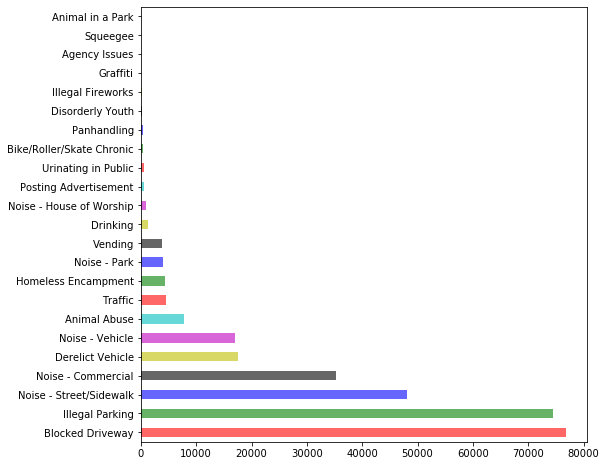

In [45]:
my_color=['r', 'g', 'b', 'k', 'y', 'm', 'c']
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
new_df_service['Complaint Type'].value_counts().plot(kind="barh",color=my_color,alpha=0.6,figsize=(8,8))
plt.show()

In [46]:
new_df_service['Descriptor'].value_counts()[:16]

Loud Music/Party                  60829
No Access                         56822
Posted Parking Sign Violation     22274
Loud Talking                      21377
Partial Access                    19988
With License Plate                17588
Blocked Hydrant                   15898
Commercial Overnight Parking      11962
Car/Truck Music                   11227
Blocked Sidewalk                  10997
Double Parked Blocking Traffic     5636
Double Parked Blocking Vehicle     4208
Engine Idling                      4178
Banging/Pounding                   4110
Neglected                          3782
Car/Truck Horn                     3493
Name: Descriptor, dtype: int64

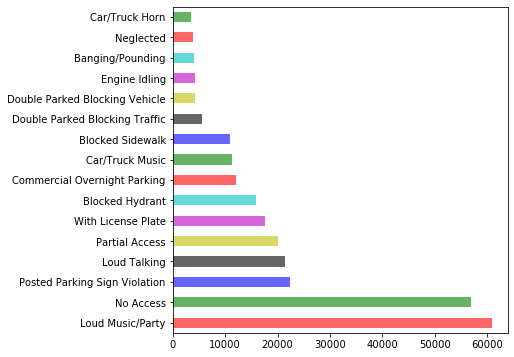

In [47]:
my_color=['r', 'g', 'b', 'k', 'y', 'm', 'c']
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white
new_df_service['Descriptor'].value_counts()[:16].plot(kind="barh",color=my_color,alpha=0.6,figsize=(6,6))
plt.show()

In [48]:
new_df_service['Descriptor'].value_counts()[:16]

Loud Music/Party                  60829
No Access                         56822
Posted Parking Sign Violation     22274
Loud Talking                      21377
Partial Access                    19988
With License Plate                17588
Blocked Hydrant                   15898
Commercial Overnight Parking      11962
Car/Truck Music                   11227
Blocked Sidewalk                  10997
Double Parked Blocking Traffic     5636
Double Parked Blocking Vehicle     4208
Engine Idling                      4178
Banging/Pounding                   4110
Neglected                          3782
Car/Truck Horn                     3493
Name: Descriptor, dtype: int64

In [49]:
top_complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']


In [50]:
comp_boro=new_df_service.groupby(['Borough','Complaint Type']).size().unstack()

In [51]:
comp_boro

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Borough,,,,,,,,,,,,,,,,,,,,,,,
BRONX,NaN,1415.0,NaN,20.0,12754.0,1952.0,63.0,188.0,9.0,246.0,24.0,7859.0,2433.0,79.0,547.0,8889.0,3396.0,19.0,17.0,NaN,357.0,51.0,379.0
BROOKLYN,NaN,2394.0,NaN,111.0,28147.0,5179.0,72.0,257.0,43.0,857.0,61.0,27461.0,11458.0,340.0,1555.0,13353.0,5176.0,49.0,45.0,NaN,1086.0,136.0,515.0
MANHATTAN,NaN,1525.0,NaN,225.0,2071.0,537.0,69.0,295.0,22.0,2778.0,36.0,12129.0,14554.0,194.0,1210.0,20543.0,5484.0,193.0,41.0,4.0,1550.0,251.0,2398.0
QUEENS,NaN,1876.0,NaN,59.0,31639.0,8108.0,59.0,357.0,37.0,464.0,37.0,21979.0,6073.0,299.0,636.0,4407.0,2615.0,32.0,30.0,NaN,1305.0,140.0,477.0
STATEN ISLAND,NaN,557.0,NaN,7.0,2142.0,1766.0,23.0,175.0,2.0,71.0,10.0,4886.0,678.0,17.0,67.0,817.0,356.0,12.0,515.0,NaN,198.0,14.0,25.0
Unspecified,6.0,1.0,1.0,2.0,57.0,46.0,NaN,3.0,NaN,NaN,NaN,218.0,51.0,NaN,7.0,67.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0


In [52]:
comp_boro=comp_boro[top_complaints]

In [53]:
comp_boro.columns

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Street/Sidewalk', 'Derelict Vehicle', 'Animal Abuse'],
      dtype='object', name='Complaint Type')

In [54]:
comp_boro.iloc[1]

Complaint Type
Blocked Driveway           28147.0
Illegal Parking            27461.0
Noise - Commercial         11458.0
Noise - Street/Sidewalk    13353.0
Derelict Vehicle            5179.0
Animal Abuse                2394.0
Name: BROOKLYN, dtype: float64

<Figure size 1152x576 with 0 Axes>

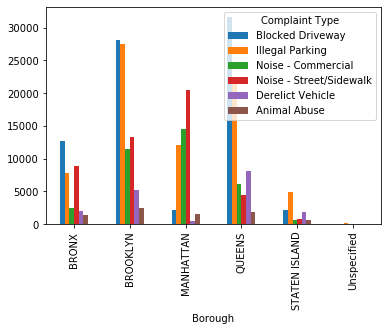

In [55]:
plt.figure(figsize=(16,8))
comp_boro.plot.bar()

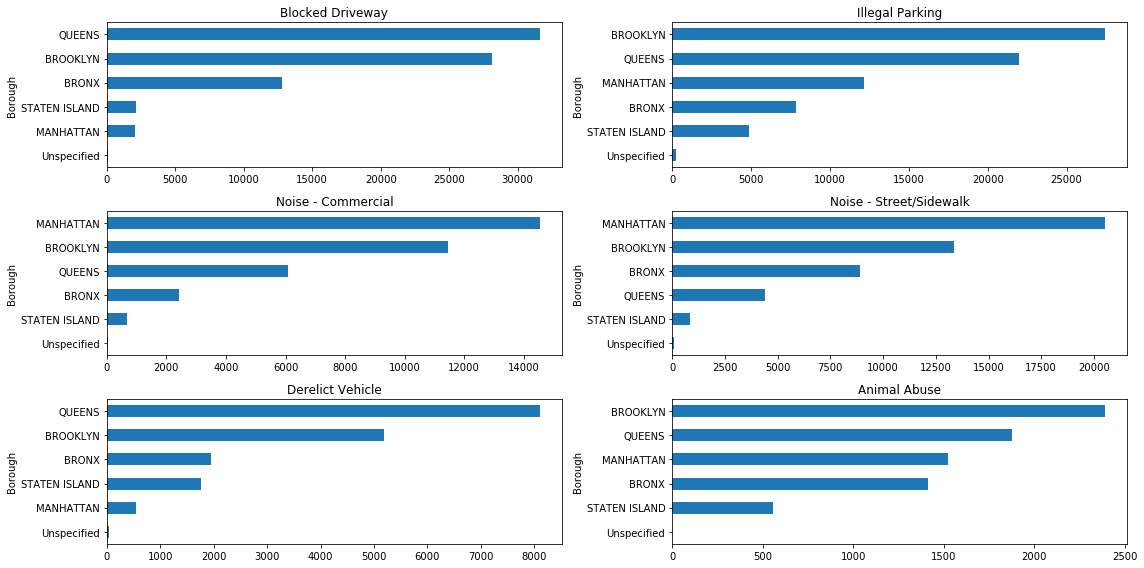

In [56]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(16,8))
# sns.set()

for i, (label,col) in enumerate(comp_boro.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

# plt.show()


* Queens has highest complaints of "Blocked Driveway" and  "Derelict Vehicle".
* Brooklyn has Highest registered complaints in "Illegal Parking" and "Animal Abuse",Brooklyn has also highest rate of compalints in Noise.
* Noise-Commercial and Noise-Street/Sidewalk complaints highest in Manhattan.

In [57]:
boro_comp=new_df_service.groupby(['Complaint Type','Borough']).size().unstack()

In [58]:
boro_comp

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Complaint Type,,,,,,
Agency Issues,NaN,NaN,NaN,NaN,NaN,6.0
Animal Abuse,1415.0,2394.0,1525.0,1876.0,557.0,1.0
Animal in a Park,NaN,NaN,NaN,NaN,NaN,1.0
Bike/Roller/Skate Chronic,20.0,111.0,225.0,59.0,7.0,2.0
Blocked Driveway,12754.0,28147.0,2071.0,31639.0,2142.0,57.0
Derelict Vehicle,1952.0,5179.0,537.0,8108.0,1766.0,46.0
Disorderly Youth,63.0,72.0,69.0,59.0,23.0,NaN
Drinking,188.0,257.0,295.0,357.0,175.0,3.0
Graffiti,9.0,43.0,22.0,37.0,2.0,NaN


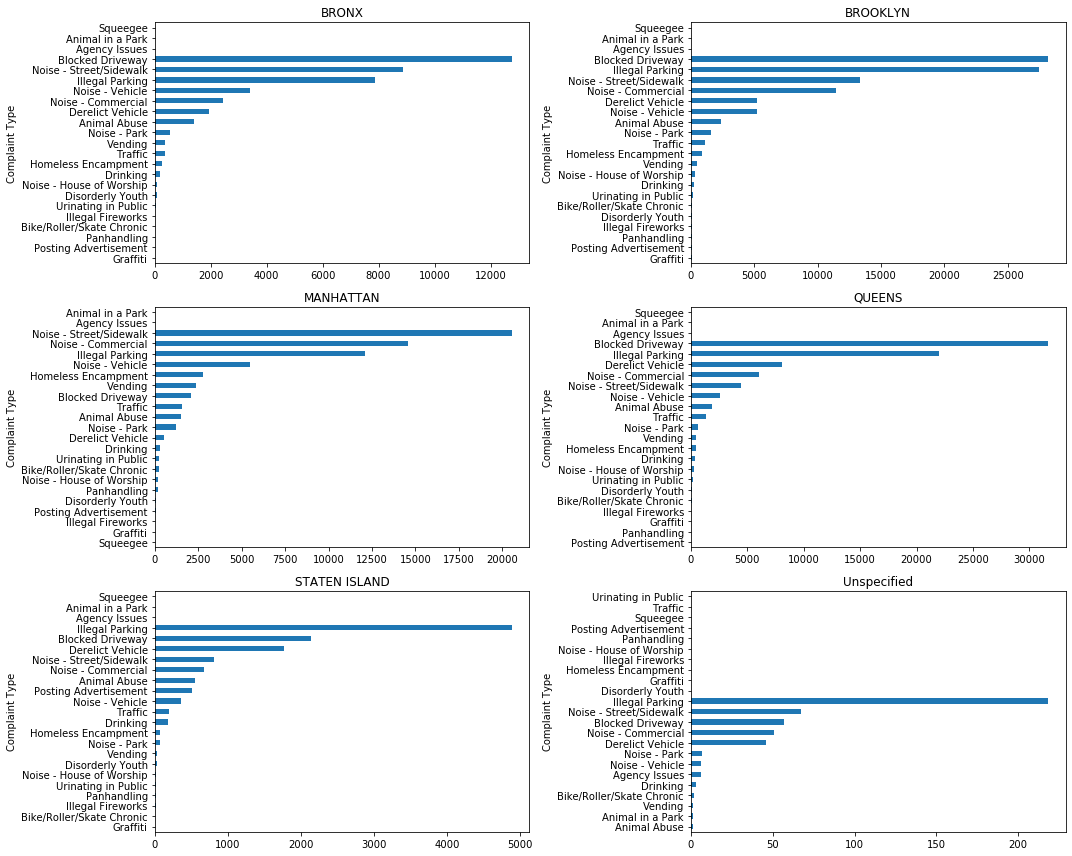

In [59]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(15,12))
# sns.set()

for i, (label,col) in enumerate(boro_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()


* Blocked Driveway and Illegal Parking is better in MANHATTEN compared with other Borough.

* Blocked Driveway,Illegal Parking and Noise is main problem of every city.


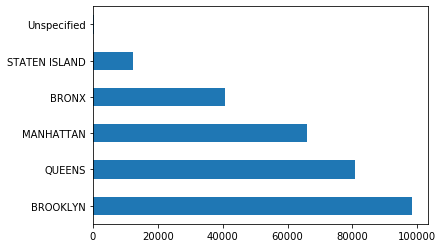

In [60]:
new_df_service['Borough'].value_counts().plot(kind="barh")

* Brooklyn has registered most number of complaints


# City-Wise complaint

In [61]:
city_count=new_df_service['City'].value_counts()[:10]

In [62]:
city_count.index

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA', 'ASTORIA',
       'FLUSHING', 'RIDGEWOOD', 'CORONA', 'WOODSIDE'],
      dtype='object')

In [63]:
city_count

BROOKLYN         98295
NEW YORK         65972
BRONX            40697
STATEN ISLAND    12338
JAMAICA           7294
ASTORIA           6330
FLUSHING          5970
RIDGEWOOD         5162
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

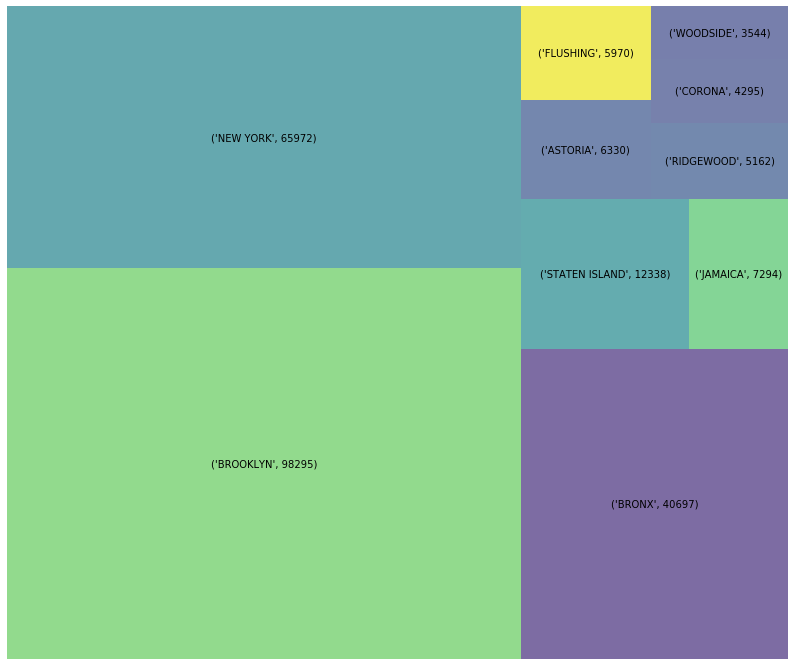

In [64]:
import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(city_count.index),city_count)
squarify.plot(sizes=city_count, label=label, alpha=0.7)
plt.axis('off')
plt.show()

# squarify ,It can show groupwise count of complaints in city-wise

* Brooklyn city has registered maximum number of complaints, Approx 30% complaints in Brooklyn city followed by other two New york & Bronx

# Request Closing Time for Complaints

In [65]:
new_df_service["Request_closing_time"].describe()

count                    298534
mean     0 days 04:18:51.832782
std      0 days 06:05:22.141833
min             0 days 00:01:00
25%             0 days 01:16:33
50%      0 days 02:42:55.500000
75%             0 days 05:21:00
max            24 days 16:52:22
Name: Request_closing_time, dtype: object

In [66]:
new_df_service['Request_closing_hr']=new_df_service["Request_closing_time"].astype('timedelta64[h]')+1 # astype can convert the time in a single hour 

In [67]:
new_df_service['Request_closing_hr'].max()

593.0

In [68]:
new_df_service[['Request_closing_time','Request_closing_hr']].head() # we can show two coloumn at a single time with two list or list in list ,important one

,Request_closing_time,Request_closing_hr
0,00:55:15,1.0
1,01:26:16,2.0
2,04:51:31,5.0
3,07:45:14,8.0
4,03:27:02,4.0


Now we can perform some Stastics function on time

In [69]:
mean=new_df_service['Request_closing_hr'].mean()
std_deviation=new_df_service['Request_closing_hr'].std()

print(mean)
print(std_deviation)

4.824009995511399
6.091285544795425


In [70]:
new_df_service['Request_closing_hr'].sort_values().head(10)

0         1.0
245262    1.0
182608    1.0
245260    1.0
245259    1.0
245258    1.0
245257    1.0
104310    1.0
49441     1.0
49443     1.0
Name: Request_closing_hr, dtype: float64

In [71]:
# new_.head()

In [72]:
norm = matplotlib.colors.Normalize(vmin=min(city_count), vmax=max(city_count))
colors = [matplotlib.cm.Blues(norm(value)) for value in city_count]


In [73]:
head_tail=pd.concat([new_df_service['Request_closing_hr'].sort_values().head(),new_df_service['Request_closing_hr'].sort_values().tail()],axis=1)

In [74]:
head_tail

,Request_closing_hr,Request_closing_hr
0,1.0,NaN
12099,NaN,224.0
21139,NaN,520.0
23527,NaN,578.0
182608,1.0,NaN
242796,NaN,593.0
245259,1.0,NaN
245260,1.0,NaN
245262,1.0,NaN
281061,NaN,337.0


# ** We can see the in some cases closing timing of complaints is very high, So for this reason may be OUTLIER is present in Dataset.

** For finding outlier in Dataset by 4 method:

1- Z-score

2- Boxplot

3- Scatter plot

4- Inter-quartile Range

***We can choose Z-Score Test for outlier***

Formula:
 
 Z=(number in dataset-mean of population)/standard_deviation
 



In [75]:
outlier=[]
def detect_outlier(data):
    
    threshold=1
    mean=np.mean(data)
    stand_dev=np.mean(data)
    
    for i in data:
        z_score=(i-mean)/stand_dev
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier
    
    
    

In [136]:
detect_outlier(new_df_service['Request_closing_hr'])[0:5]

[10.0, 10.0, 10.0, 10.0, 10.0]

In [77]:
outlier.sort()

In [78]:
len(outlier)

30903

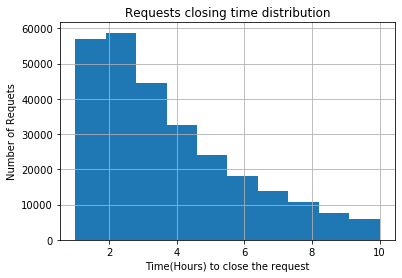

In [79]:
plot_data = new_df_service[((new_df_service['Request_closing_hr']-mean)/std_deviation)<1]
plot_data['Request_closing_hr'].hist(bins=10)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()



*** 95 % complaints are closed within 10 hr.

*** 50 % complaints are closed within 2 to 4 hr.


In [80]:
len(plot_data['Request_closing_hr'])

273458

In [81]:
len(new_df_service['Request_closing_hr'])

298534

In [82]:
per_cent=273458/298534

In [83]:
per_cent

0.9160028673450931

In [84]:
type(plot_data['Request_closing_hr'])

pandas.core.series.Series

# ****    2nd Method detection of outlier is interquartile range

In [85]:
df_out=new_df_service['Request_closing_hr'].sort_values().tail(10) # First step to arrange in increasing order

In [86]:
quantile1,quantile3=np.percentile(df_out,[25,75]) # 2nd step to find the first(25 percent) and 3rd (75 percent) range with np.percentile

In [87]:
print(quantile1,quantile3)

201.0 474.25


In [88]:
iqr_val=quantile3-quantile1 # Find the IQR 

In [89]:
iqr_val

273.25

In [90]:
# step 4--Find the lower bound value and upper bound value

In [91]:
lower_bound_value=quantile1-(iqr_val*1.5)
upper_bound_value=quantile3+(iqr_val*1.5)

In [92]:
print(lower_bound_value,upper_bound_value)

-208.875 884.125


In [93]:
new_df_service['Request_closing_hr'].max()

593.0

In [94]:
for i in comp_boro.columns:
    print(i,'=',comp_boro[i].sum())


Blocked Driveway = 76810.0
Illegal Parking = 74532.0
Noise - Commercial = 35247.0
Noise - Street/Sidewalk = 48076.0
Derelict Vehicle = 17588.0
Animal Abuse = 7768.0


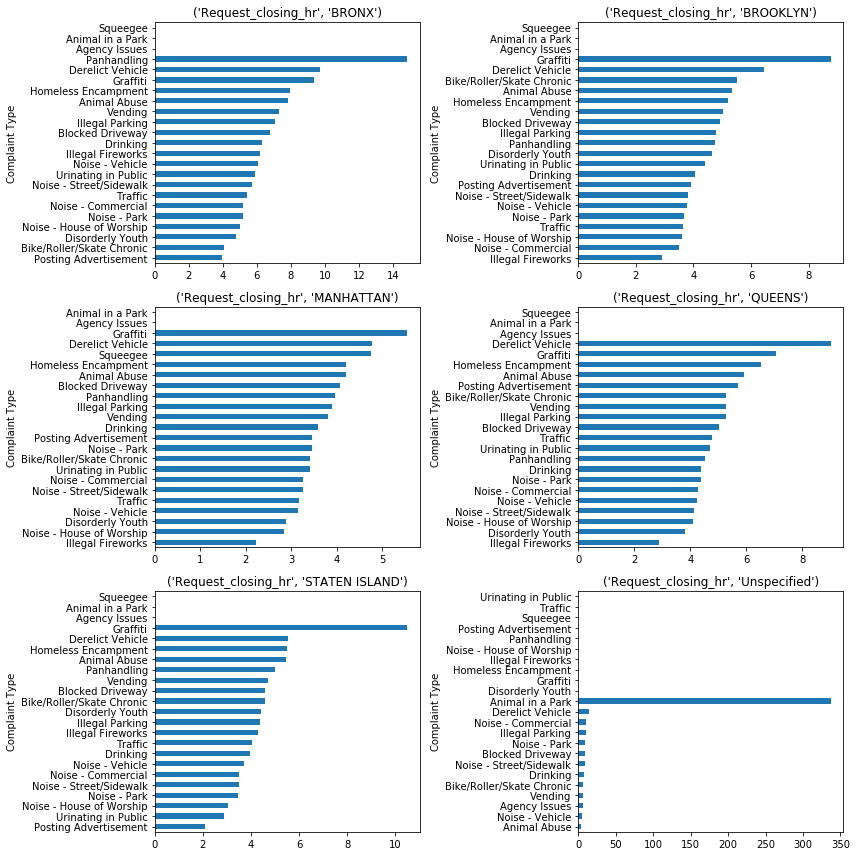

In [95]:
citywise_resolution = new_df_service.groupby(['Complaint Type','Borough'])[['Request_closing_hr']].mean().unstack()

# .groupby method divide the data into key and vlaue pair
# .unstack can centralised the data

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:24]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()



*** Griffti complaints taking a long time to be closed.It is taking too much time because Griffti complaints are less in comparision to other complaints.so department much focussed on other complaints which have more complaints count.


*** In all cities  are handling Noise complaints very well.

*** Brooklyn and Manhatten are handling Traffic complaints very well.


# ****Now we can analyse the month wise complaints 

In [96]:
import pandas as pd

d='2015-01-08 22:44:09' 
date=pd.to_datetime(d).date()
print(date)

2015-01-08


In [97]:
new_df_service['date_only'] = new_df_service['Created Date'].dt.date


In [98]:
new_df_service['date_only'].head()

0    2015-12-31
1    2015-12-31
2    2015-12-31
3    2015-12-31
4    2015-12-31
Name: date_only, dtype: object

In [99]:
new_df_service['month_year'] = pd.to_datetime(new_df_service['date_only']).dt.to_period('M')

In [100]:
new_df_service['month_year'].head()

0    2015-12
1    2015-12
2    2015-12
3    2015-12
4    2015-12
Name: month_year, dtype: period[M]

In [101]:
data_month=new_df_service.groupby('month_year').size()

In [102]:
data_month

month_year
2015-03     2457
2015-04    27169
2015-05    36069
2015-06    35142
2015-07    34416
2015-08    34773
2015-09    35176
2015-10    32398
2015-11    30594
2015-12    30340
Freq: M, dtype: int64

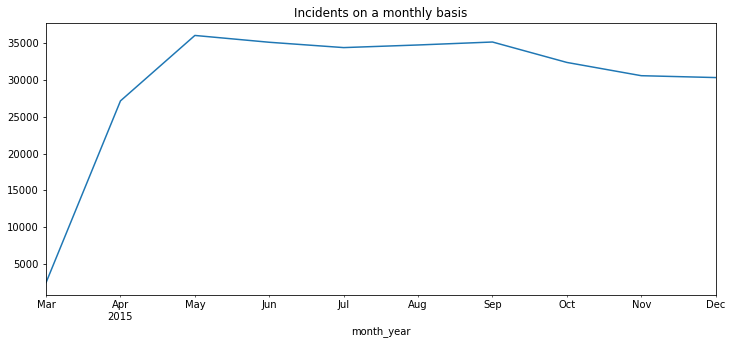

In [103]:
data_month.plot(figsize=(12,5), title='Incidents on a monthly basis')

*** In march least complaints

*** After April the Complaints level is high

*** Approximate lineraly complaints registered from May to December.

*** Highest complaints in May

......


..........

In [104]:
new_df_service.groupby(['month_year','Borough']).size().unstack()

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
month_year,,,,,,
2015-03,297,832,499,720,105,4
2015-04,3212,8770,6619,7453,1050,65
2015-05,5125,11623,8851,9156,1263,51
2015-06,4848,11887,7497,9462,1385,63
2015-07,5556,10690,7565,9216,1335,54
2015-08,5439,10847,7765,9118,1520,84
2015-09,4798,12037,7630,9201,1456,54
2015-10,3963,10639,7225,9139,1407,25
2015-11,3682,10548,6345,8553,1436,30


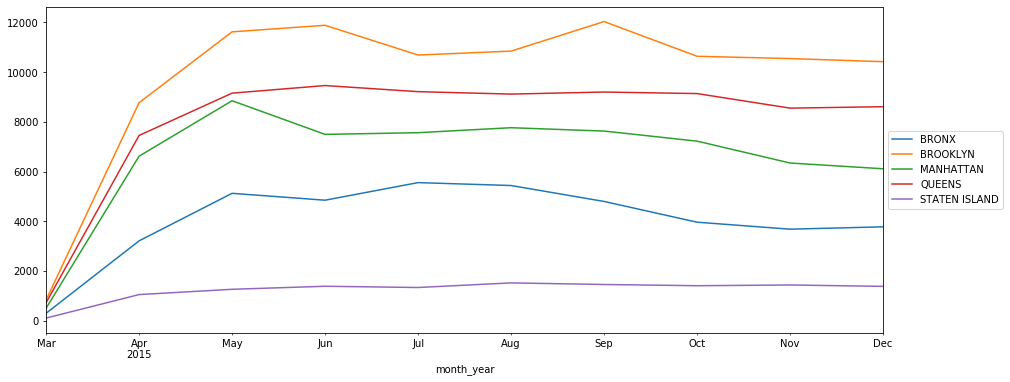

In [105]:
new_df_service.groupby(['month_year','Borough']).size().unstack().drop(columns=['Unspecified']).plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));


***  Brooklyn has recorded most number of compalints

....

In [106]:
for i,e in enumerate(comp_boro.index):
     print(e,'=',comp_boro.loc[e].sum())
#     print(e)


BRONX = 35302.0
BROOKLYN = 87992.0
MANHATTAN = 51359.0
QUEENS = 74082.0
STATEN ISLAND = 10846.0
Unspecified = 440.0


In [107]:
type(comp_boro.loc[e].sum())

numpy.float64

In [108]:
s=35302/298534
print(s)

0.11825118746943397


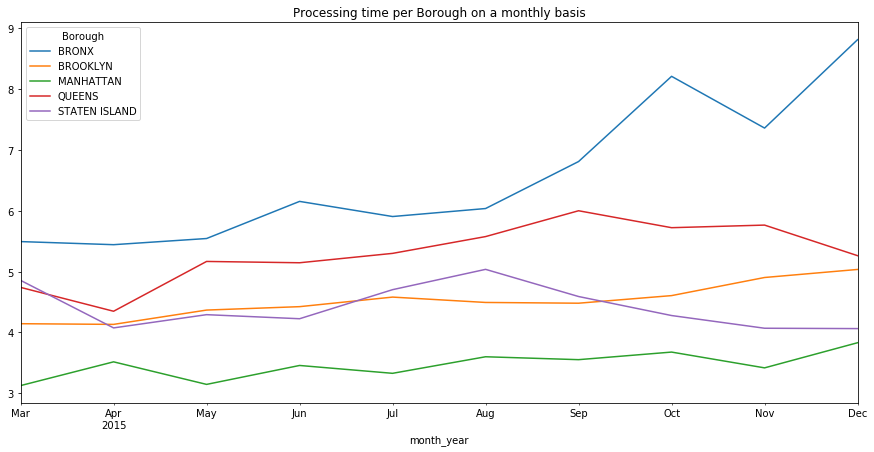

In [109]:
new_df_service.groupby(['month_year','Borough'])['Request_closing_hr'].mean().unstack().drop(columns=['Unspecified']).plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');


*** Bronx has highest closing time of complaints instead of others.

*** Manhatten best closing time of complaints instead of others.

*** Broklyn has highest complaints and still it has good response in closing complaints time.

..

# Conclusion:

*** Most of complaints raised in May and September, while least in February.

*** Most complaints raised in Brooklyn city.

*** Request closing complaint time is better in Manhatten in compared to other cities.

*** Highest number of complaints raised are of 'Blocked Driveway'.(26% of all the complaints).

*** Second highest complaints raised are Illegal Parking and Noise(commercial+street) upto 28%.
.




.

# Hypothesis Testing :
    



# 1- Whether the average response time across complaint types is similar or not (overall).


*** So we want to perform hypothesis testing on one categorical and numrical data , So we prefer Annova test for this testing.

Lets take the Assumptions of Annova Test.

1-The population must be close to a normal distribution.

2-Samples must be independent. 

3-Population variances must be equal.

4-Groups must have equal sample sizes.

In [110]:
new_df_service['Complaint Type'].value_counts()

Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [111]:
new_df_service.groupby('Complaint Type', as_index=False)['Request_closing_hr'].mean()

,Complaint Type,Request_closing_hr
0,Agency Issues,5.666667
1,Animal Abuse,5.716787
2,Animal in a Park,337.000000
3,Bike/Roller/Skate Chronic,4.275943
4,Blocked Driveway,5.243106
5,Derelict Vehicle,7.877530
6,Disorderly Youth,4.048951
7,Drinking,4.368627
8,Graffiti,7.654867
9,Homeless Encampment,4.868659


In [112]:
new_df_service['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [113]:
new_df_service.groupby('Complaint Type', as_index=False)['Request_closing_hr'].mean().drop([2]).reset_index(drop=True)

,Complaint Type,Request_closing_hr
0,Agency Issues,5.666667
1,Animal Abuse,5.716787
2,Bike/Roller/Skate Chronic,4.275943
3,Blocked Driveway,5.243106
4,Derelict Vehicle,7.877530
5,Disorderly Youth,4.048951
6,Drinking,4.368627
7,Graffiti,7.654867
8,Homeless Encampment,4.868659
9,Illegal Fireworks,3.309524


In [114]:
hypo_df=new_df_service.groupby('Complaint Type', as_index=False)['Request_closing_hr'].mean().drop([2]).reset_index(drop=True)

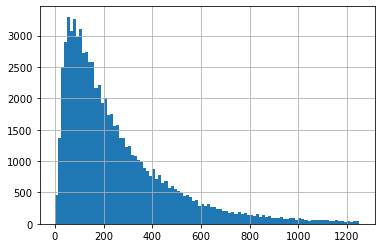

In [115]:
new_df_service['Request_Closing_Minutes'] = new_df_service['Request_closing_time'].astype('timedelta64[m]')+1

data_ = new_df_service[new_df_service['Complaint Type']=='Blocked Driveway']['Request_Closing_Minutes']
data_.hist(bins=100,range=(0,1250))

In [116]:
# So we can see that ,distribution is not close to normal distribution
#  We can do the log transformation for distribution
#  It is right or positively skewed data , So mean is higher than median


In [117]:
data_.describe()

count    76810.000000
mean       285.148041
std        334.460160
min          3.000000
25%         97.000000
50%        191.000000
75%        359.000000
max       8898.000000
Name: Request_Closing_Minutes, dtype: float64

In [118]:
# hen we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.
# Log transformation removes the skewness from the data.

In [119]:
dic = {}
for complaint in new_df_service['Complaint Type'].unique():
    dic[complaint] = np.log(new_df_service[new_df_service['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [120]:
dic.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

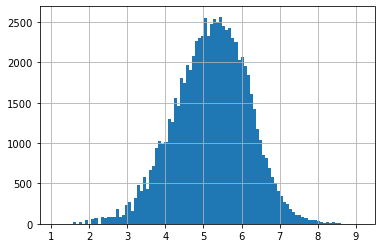

In [121]:
dic['Blocked Driveway'].hist(bins=100)


Now we can see that the data distribution is close gausiian distribution or normal distribution.

In [122]:
for complaint in dic.keys():
    print(dic[complaint].std())

1.088810766064205
0.9689925833875241
1.0676265933053914
1.2473713130448358
1.0751948896175374
1.1578783566404027
1.1940496830014729
1.064089509846298
1.0353212429125318
1.098753543976176
1.1690311702610785
1.0354238334658072
1.1547492289003025
1.0578811759503506
1.1038829059331876
1.0212999697423415
1.0896898895618483
1.0581967861803852
1.027674837024446
1.1905406895067956
0.8285353314860184
0.8469384425802964
nan


To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.
Below conditions should be met before conducting ANOVA.

1-All distributions must follow a normal distributions curve. We have verified this after the log transformation

2-Standard deviation for all groups must be same. Above output proves that this is true.

3-All samples are drawn independently of each other.

In [123]:
[ complaint for complaint in dic.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Agency Issues',
 'Squeegee',
 'Animal in a Park']

* Now we will futher move on to defining hypothesis and critical values........

* Null Hypothesis---- Average response time for all the complaints type is same.

* Alternate Hypothesis----Average response time for all the complaints type is not same and theres is some difference among the groups.

..........

* Below We conduct ANOVA test for top 5 type of complaints

* For a 95% of confidence interval we choose our alpha as 0.05 for 5%

* Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

1-if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

2-if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [125]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p_value = f_oneway(dic['Noise - Street/Sidewalk'],dic['Blocked Driveway'],dic['Illegal Parking'],dic['Derelict Vehicle'],
                   dic['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

Statistics=2466.502, p=0.000
 we are rejecting null hypothesis


1-As our p-value is quite low , hence it is being converted to 0.0

2-Since our p-value is lower that our alpha value (significance value), we will conclude that we have enogh evidence to reject Null Hypothesis.

# 2. Are the type of complaint or service requested and location related?

To find the correlation between location and complaint types, we will consider below columns
 
 1- Complaint Type
 2- Borough
 3- City
 4- Longitude
 5- Latitude

In [126]:
corr_dataset = new_df_service[['Complaint Type','Borough','Longitude','Latitude','City']]


In [127]:
corr_dataset.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682,NEW YORK
1,Blocked Driveway,QUEENS,-73.915094,40.775945,ASTORIA
2,Blocked Driveway,BRONX,-73.888525,40.870325,BRONX
3,Illegal Parking,BRONX,-73.828379,40.835994,BRONX
4,Illegal Parking,QUEENS,-73.874170,40.733060,ELMHURST


*** So we can check there is any relation ship between present in complaint type and location.

*** So,if we perform correlation method then we have two numerical and three catgorical data.

*** But correlation method is only for numerical variable so we can convert cat variable into numerical var by label Encoding.

In [128]:
# corr_dataset['Complaint Type'] = corr_dataset['Complaint Type'].astype('category')
# d = dict(enumerate(corr_dataset['Complaint Type'].cat.categories))

# corr_dataset['mycol_codes'] = corr_dataset['Complaint Type'].cat.codes
# corr_dataset['mycol_reversed'] = corr_dataset['mycol_codes'].map(d)

# corr_dat['Borough'] = corr_dat['Borough'].astype('category')
# d = dict(enumerate(corr_dat['Borough'].cat.categories))
# corr_dat['mycol_codes'] = corr_dat['Borough'].cat.codes
# corr_dat['mycol_reversed'] = corr_dat['mycol_codes'].map(d)



In [129]:
# corr_dataset['Complaint Type'] = corr_dataset['Complaint Type'].cat.codes
# corr_dataset['Borough'] = corr_dataset['Borough'].cat.codes
# corr_dataset['City'] = corr_dataset['City'].cat.codes

corr_dataset['Complaint Type'] = corr_dataset['Complaint Type'].astype('category').cat.codes
corr_dataset['Borough'] = corr_dataset['Borough'].astype('category').cat.codes
corr_dataset['City'] = corr_dataset['City'].astype('category').cat.codes

c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [130]:
corr_dataset.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,15,2,-73.923501,40.865682,33
1,4,3,-73.915094,40.775945,1
2,4,0,-73.888525,40.870325,6
3,11,0,-73.828379,40.835994,6
4,11,3,-73.874170,40.733060,13


In [131]:
df_corr=corr_dataset.corr(method='pearson')

In [132]:
df_corr

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.065506,-0.181022,0.152829,0.094572
Borough,-0.065506,1.000000,0.021363,-0.249488,0.705705
Longitude,-0.181022,0.021363,1.000000,0.364962,-0.123858
Latitude,0.152829,-0.249488,0.364962,1.000000,-0.000568
City,0.094572,0.705705,-0.123858,-0.000568,1.000000


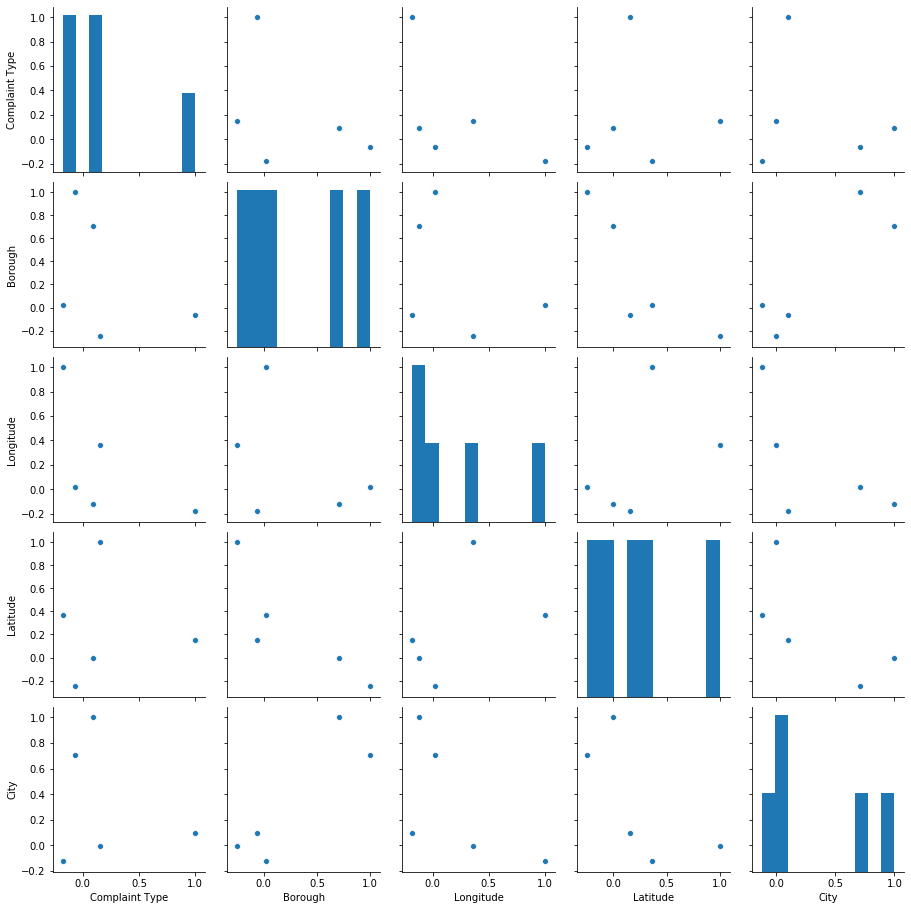

In [133]:
sns.pairplot(df_corr)

*** As we can clearly seen that, There is no relationship between complaint type and location , no value close to 1.

*** 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.